In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import kurtosis, skew
from scipy.stats import skewnorm

In [2]:
import matplotlib as mpl

# font = {'weight' : 'bold',
#         'size'   : 14}
font = {'size'   : 18}

mpl.rc('font', **font)

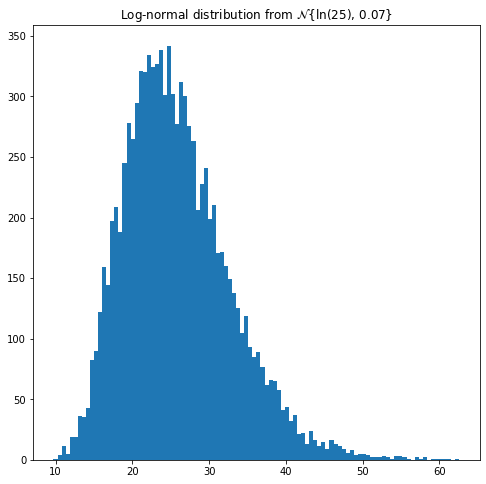

In [11]:
test_set = np.exp(np.random.normal(np.log(25), np.sqrt(0.07), 10000))
plt.figure(figsize=(8,8))
plt.title("Log-normal distribution from $\mathcal{N}${ln(25), 0.07}")
plt.hist(test_set, 100)
plt.show()

In [4]:
time_res = np.arange(1/120, 10, 0.1)
print(time_res)

def quantisation(data, q_step):
    sampled_set = np.zeros(len(data))

    for i in range(len(data)):
        x = data[i]
        exc = x % q_step
        sampled_set[i] = random.choices([x - exc, x + q_step - exc], weights=[1 - exc, exc])[0]
    return sampled_set

[8.33333333e-03 1.08333333e-01 2.08333333e-01 3.08333333e-01
 4.08333333e-01 5.08333333e-01 6.08333333e-01 7.08333333e-01
 8.08333333e-01 9.08333333e-01 1.00833333e+00 1.10833333e+00
 1.20833333e+00 1.30833333e+00 1.40833333e+00 1.50833333e+00
 1.60833333e+00 1.70833333e+00 1.80833333e+00 1.90833333e+00
 2.00833333e+00 2.10833333e+00 2.20833333e+00 2.30833333e+00
 2.40833333e+00 2.50833333e+00 2.60833333e+00 2.70833333e+00
 2.80833333e+00 2.90833333e+00 3.00833333e+00 3.10833333e+00
 3.20833333e+00 3.30833333e+00 3.40833333e+00 3.50833333e+00
 3.60833333e+00 3.70833333e+00 3.80833333e+00 3.90833333e+00
 4.00833333e+00 4.10833333e+00 4.20833333e+00 4.30833333e+00
 4.40833333e+00 4.50833333e+00 4.60833333e+00 4.70833333e+00
 4.80833333e+00 4.90833333e+00 5.00833333e+00 5.10833333e+00
 5.20833333e+00 5.30833333e+00 5.40833333e+00 5.50833333e+00
 5.60833333e+00 5.70833333e+00 5.80833333e+00 5.90833333e+00
 6.00833333e+00 6.10833333e+00 6.20833333e+00 6.30833333e+00
 6.40833333e+00 6.508333

In [5]:
mean_true = np.mean(test_set)
var_true = np.var(test_set)
mean_est = []
var_est = []

sk_true = skew(test_set)
sk_est = []
kur_true = kurtosis(test_set)
kur_est = []

for t in time_res:
    res = quantisation(test_set, t)
    mean_est.append(np.mean(res))
    var_est.append(np.var(res))
    sk_est.append(skew(res))
    kur_est.append(kurtosis(res))
    if t == 3.025:
        plt.hist(res, 100)
plt.show()

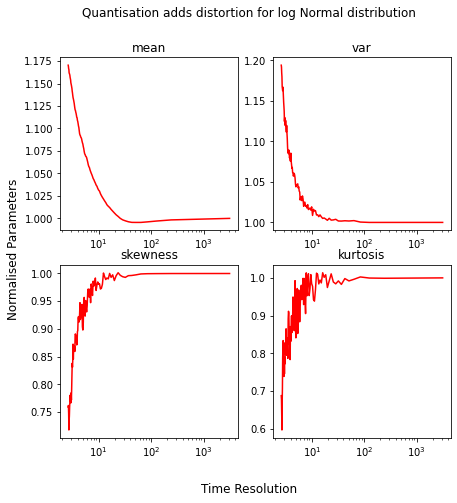

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Quantisation adds distortion for log Normal distribution')
axs[0, 0].set_title('mean')
axs[0, 0].plot(mean_est[0]/time_res, np.array(mean_est)/mean_true, c='red')
axs[0, 0].set_xscale("log")
# axs[0, 0].axhline(mean_true)

axs[0, 1].set_title('var')
axs[0, 1].plot(mean_est[0]/time_res, np.array(var_est)/var_true, c='red')
axs[0, 1].set_xscale("log")
# axs[0, 1].axhline(var_true)

axs[1, 0].set_title('skewness')
axs[1, 0].plot(mean_est[0]/time_res, np.array(sk_est)/sk_true, c='red')
axs[1, 0].set_xscale("log")
# axs[1, 0].axhline(sk_true)

axs[1, 1].set_title('kurtosis')
axs[1, 1].plot(mean_est[0]/time_res, np.array(kur_est)/kur_true, c='red')
axs[1, 1].set_xscale("log")
# axs[1, 1].axhline(kur_true)

fig.supylabel('Normalised Parameters')
fig.supxlabel('Time Resolution')
plt.show()

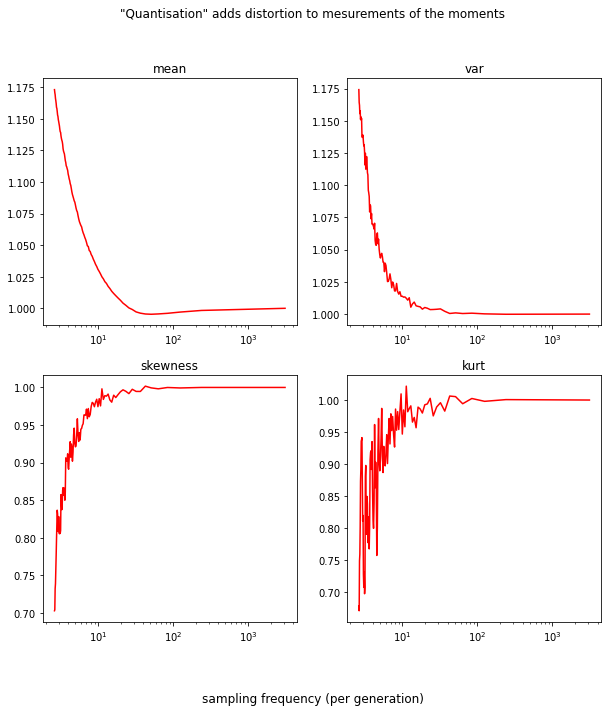

In [7]:
mean_est = np.array(mean_est)
var_est = np.array(var_est)
sk_est = np.array(sk_est)
kur_est = np.array(kur_est)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('"Quantisation" adds distortion to mesurements of the moments')
axs[0, 0].set_title('mean')
axs[0, 0].plot(mean_est[0]/time_res, mean_est/mean_est[0], c='red')
axs[0, 0].set_xscale("log")
# axs[0, 0].axhline(mean_true)
axs[0, 1].set_title('var')
axs[0, 1].plot(mean_est[0]/time_res, var_est/var_est[0], c='red')
axs[0, 1].set_xscale("log")
# axs[0, 1].axhline(var_true)
axs[1, 0].set_title('skewness')
axs[1, 0].plot(mean_est[0]/time_res, sk_est/sk_est[0], c='red')
axs[1, 0].set_xscale("log")
# axs[1, 0].axhline(sk_true)
axs[1, 1].set_title('kurt')
axs[1, 1].plot(mean_est[0]/time_res, kur_est/kur_est[0], c='red')
axs[1, 1].set_xscale("log")
# axs[1, 1].axhline(kur_true)
fig.supxlabel("sampling frequency (per generation)")
plt.show()

In [23]:
# To explain why the mean is changing, if the quantisation is performed differently

def quantisation2(data, q_step):
    sampled_set = np.zeros(len(data))

    for i in range(len(data)):
        x = data[i]
        exc = x % q_step
        if exc < q_step/2:
            sampled_set[i] = x - exc
        else:
            sampled_set[i] = x + q_step - exc
            
    return sampled_set

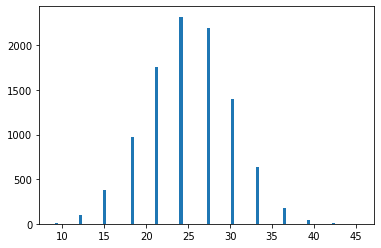

In [15]:
mean_true = np.mean(test_set)
var_true = np.var(test_set)
mean_est = []
var_est = []

sk_true = skew(test_set)
sk_est = []
kur_true = kurtosis(test_set)
kur_est = []

for t in time_res:
    res = quantisation2(test_set, t)
    mean_est.append(np.mean(res))
    var_est.append(np.var(res))
    sk_est.append(skew(res))
    kur_est.append(kurtosis(res))
    if t == 3.025:
        plt.hist(res, 100)
plt.show()

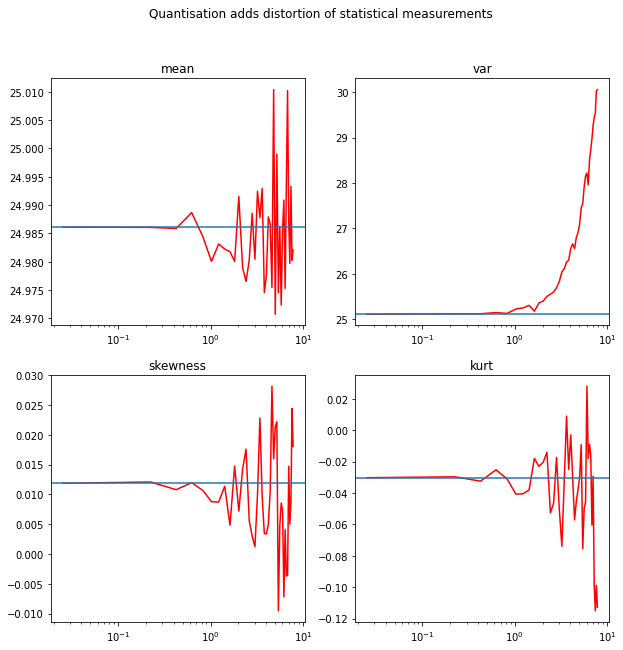

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Quantisation adds distortion of statistical measurements')
axs[0, 0].set_title('mean')
axs[0, 0].plot(time_res, mean_est, c='red')
axs[0, 0].set_xscale("log")
axs[0, 0].axhline(mean_true)
axs[0, 1].set_title('var')
axs[0, 1].plot(time_res, var_est, c='red')
axs[0, 1].set_xscale("log")
axs[0, 1].axhline(var_true)
axs[1, 0].set_title('skewness')
axs[1, 0].plot(time_res, sk_est, c='red')
axs[1, 0].set_xscale("log")
axs[1, 0].axhline(sk_true)
axs[1, 1].set_title('kurt')
axs[1, 1].plot(time_res, kur_est, c='red')
axs[1, 1].set_xscale("log")
axs[1, 1].axhline(kur_true)
plt.show()